In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer


In [27]:
# Load iris dataset
iris = datasets.load_iris()

# Create a DataFrame with the feature data
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add a new column for the target data
df['species'] = iris.target

# Map the numeric target to corresponding iris species
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [29]:
# Perform PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df.iloc[:, :-1])

# Create a DataFrame for the PCA result
pca_df = pd.DataFrame(data = pca_result, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
pca_df['Species'] = df['species']


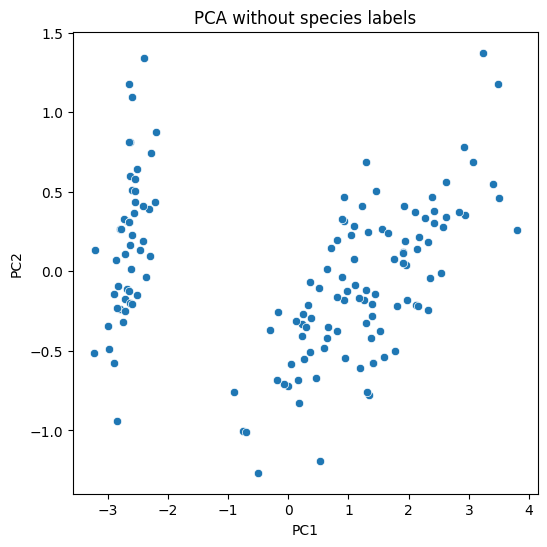

In [30]:
# Plot the first two principal components without species labels
plt.figure(figsize=(6,6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'])
plt.title('PCA without species labels')
plt.show()


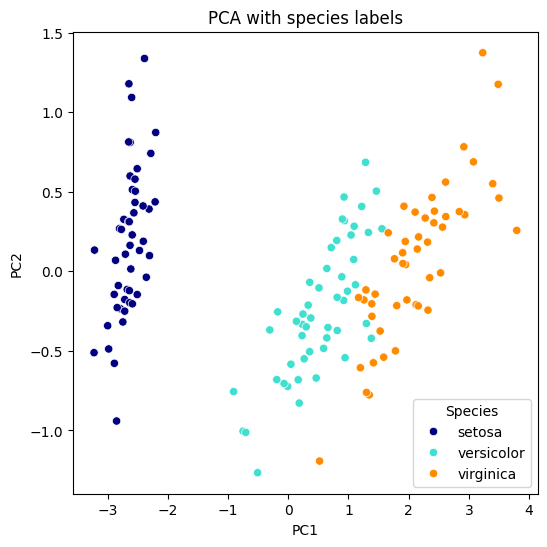

In [31]:
# Plot the first two principal components with species labels
plt.figure(figsize=(6,6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Species'], palette=['navy', 'turquoise', 'darkorange'])
plt.title('PCA with species labels')
plt.show()

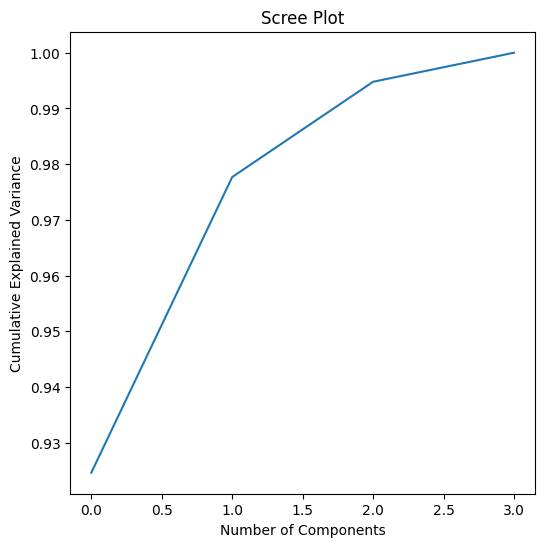

In [33]:
# Scree plot
plt.figure(figsize=(6,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

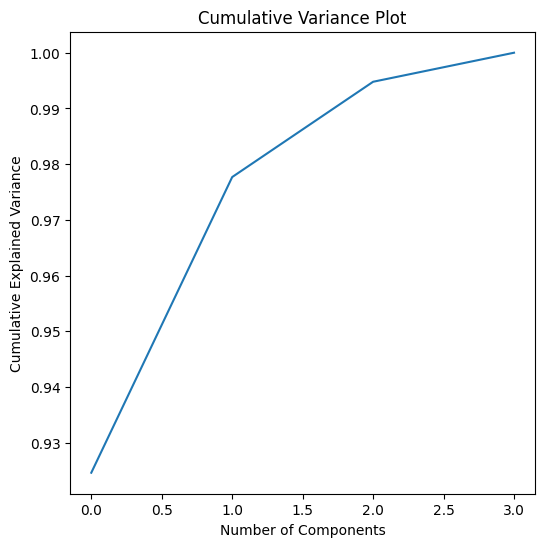

In [32]:
# Cumulative variance plot
plt.figure(figsize=(6,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Plot')
plt.show()

In [57]:
# Read the data
# Load the data
chimp_data = pd.read_csv('ChimpFirst500SNPs.data', sep=' ')

# Display the first few rows of the DataFrame
chimp_names = pd.read_csv("SpeciesNames.data", header=None)

# Replace '.' with NaN
chimp_data = chimp_data.replace('.', np.nan)

# Convert all columns to numeric
chimp_data = chimp_data.apply(pd.to_numeric, errors='coerce')

# Impute missing data using mean
# Replace missing values with mean
chimp_data_filled = chimp_data.fillna(chimp_data.mean())

In [52]:
# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(chimp_data_filled)


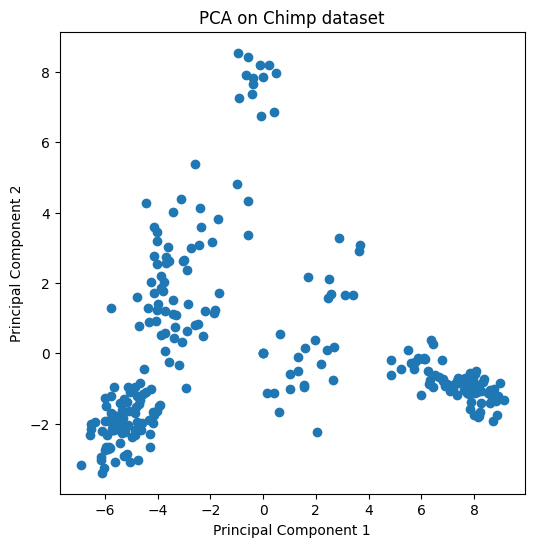

In [53]:
# Plot the first two principal components
plt.figure(figsize=(6,6))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Chimp dataset')
plt.show()

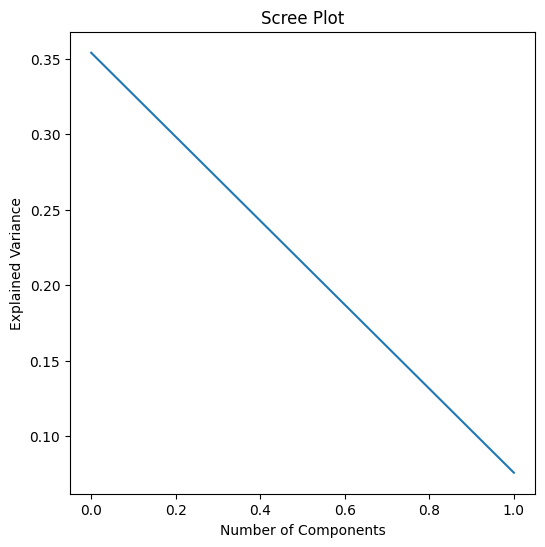

In [55]:
# Scree plot
plt.figure(figsize=(6,6))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

In [ ]:
# Cumulative variance plot
plt.figure(figsize=(6,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Plot')
plt.show()

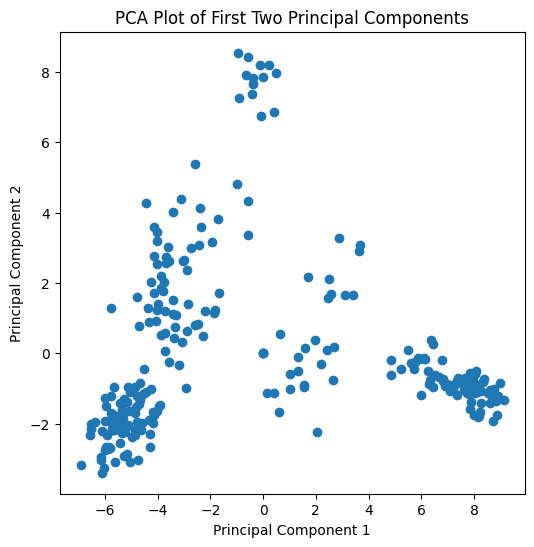

In [60]:
# Load the data
chimp_data = pd.read_csv('ChimpFirst500SNPs.data', sep=' ')

# Convert all columns to numeric
chimp_data = chimp_data.apply(pd.to_numeric, errors='coerce')

# Replace missing values with mean for numerical columns
chimp_data_mean = chimp_data.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x)

# Replace missing values with median for numerical columns
chimp_data_median = chimp_data.apply(lambda x: x.fillna(x.median()) if x.dtype.kind in 'biufc' else x)

# Perform PCA on mean
pca_mean = PCA()
chimp_data_mean_pca = pca_mean.fit_transform(chimp_data_mean)

# Perform PCA on median
pca_median = PCA()
chimp_data_median_pca = pca_median.fit_transform(chimp_data_median)

# Plotting the two first principal components
plt.figure(figsize=(6,6))
plt.scatter(chimp_data_mean_pca[:, 0], chimp_data_mean_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot of First Two Principal Components')
plt.show()

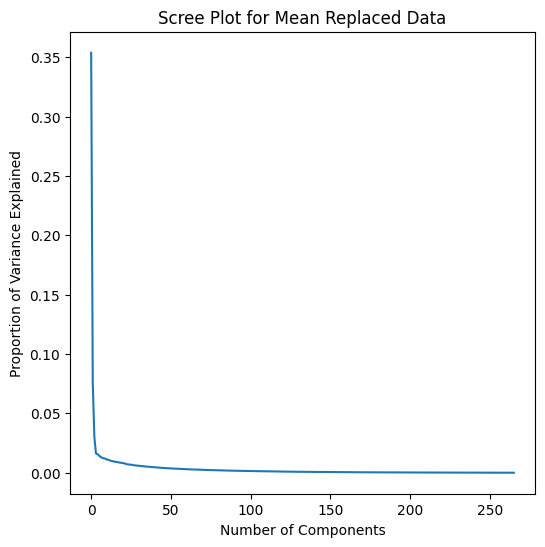

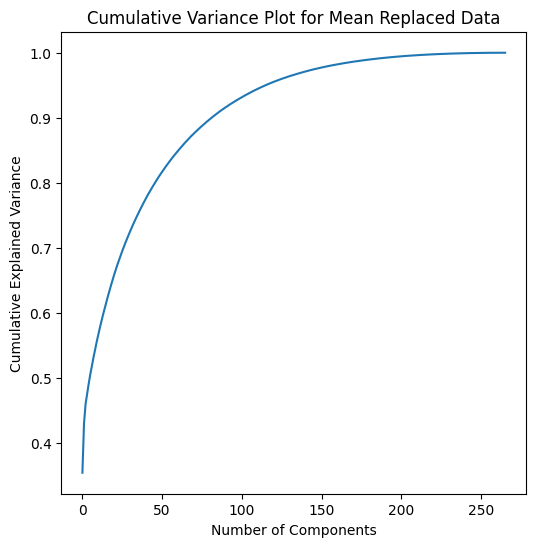

In [62]:
# Scree plot showing the proportion of variance explained for each PC
plt.figure(figsize=(6,6))
plt.plot(pca_mean.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot for Mean Replaced Data')
plt.show()

# Scree plot showing the cumulative variance explained
plt.figure(figsize=(6,6))
plt.plot(np.cumsum(pca_mean.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Plot for Mean Replaced Data')
plt.show()

In [70]:
# Read the data
turtles = pd.read_table("./PaintedTurtles.txt", sep="\t")
print(turtles.columns)

Index(['sex', 'length', 'width', 'height'], dtype='object')


In [71]:
# Select only the numeric columns
numeric_cols = turtles[['length', 'width', 'height']]

# Calculate the correlation
correlation = numeric_cols.corr()

# Display the correlation
print(correlation)

          length     width    height
length  1.000000  0.978312  0.964695
width   0.978312  1.000000  0.960571
height  0.964695  0.960571  1.000000


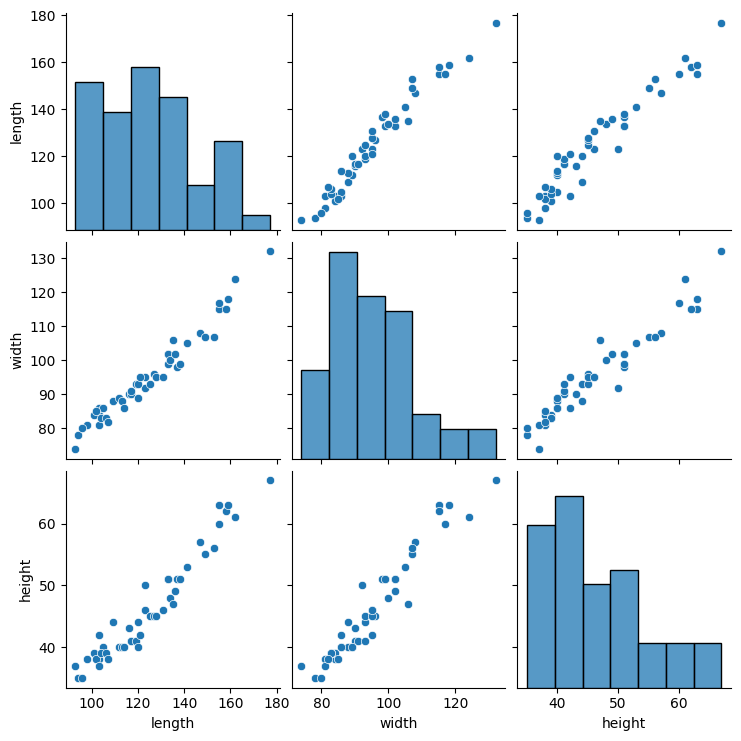

In [72]:
# Create pairplot
sns.pairplot(turtles)

# Show the plot
plt.show()

In [74]:
from sklearn.preprocessing import StandardScaler

# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler and transform the data
numeric_cols_scaled = pd.DataFrame(scaler.fit_transform(numeric_cols), columns=numeric_cols.columns)

# Display the scaled data
print(numeric_cols_scaled)

      length     width    height
0  -1.316787 -1.151031 -1.003417
1  -1.070083 -0.911856 -1.003417
2  -1.070083 -0.752406 -0.521777
3  -0.971401 -0.752406 -0.762597
4  -0.774037 -0.592955 -0.280957
5  -0.083263 -0.274055  0.441504
6  -0.083263 -0.034880 -0.040137
7   0.410147  0.284021  0.561914
8   0.410147  0.523196  0.561914
9   0.410147  0.523196  0.561914
10  0.459488  0.363746  0.200683
11  0.558170  0.523196  0.321094
12  0.607511  0.204296  0.561914
13  0.656852  0.284021  0.561914
14  0.804875  0.762371  0.802734
15  1.100921  1.001546  1.284374
16  1.199603  0.921821  1.043554
17  1.396966  0.921821  1.163964
18  1.495648  1.559622  2.006835
19  1.495648  1.719072  1.645605
20  1.643671  1.559622  1.886425
21  1.693012  1.798797  2.006835
22  1.841035  2.277148  1.766015
23  2.581150  2.914949  2.488475
24 -1.563492 -1.709107 -1.123828
25 -1.514151 -1.390206 -1.364648
26 -1.415469 -1.230756 -1.364648
27 -1.168764 -0.911856 -0.883007
28 -1.119423 -0.832131 -1.003417
29 -1.0700

In [75]:
import numpy as np

# Perform SVD
u, s, v = np.linalg.svd(numeric_cols_scaled)

# Print the loading coefficients
print("Loading coefficients (v):")
print(v)

# Check that the square of the loading coefficients sum to one
print("\nSum of square of loading coefficients for each component:")
print(np.sum(v**2, axis=1))

Loading coefficients (v):
[[ 0.57879812  0.57798399  0.57526276]
 [-0.32502731 -0.48346989  0.81278171]
 [-0.74789704  0.65741263  0.09197088]]

Sum of square of loading coefficients for each component:
[1. 1. 1.]


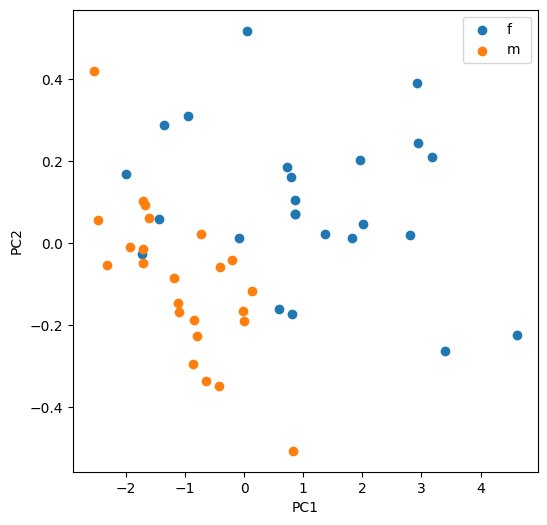

In [77]:
# Apply the loading coefficients to the data
PCs = np.dot(numeric_cols_scaled, v.T)

# Create a DataFrame with the PCs and the sex
df = pd.DataFrame(PCs, columns=[f'PC{i+1}' for i in range(PCs.shape[1])])
df['sex'] = turtles['sex']  # assuming 'sex' is the name of the column with the sex

# Plot PC1 and PC2, colored by sex
plt.figure(figsize=(6,6))
for sex in df['sex'].unique():
	plt.scatter(df[df['sex'] == sex]['PC1'], df[df['sex'] == sex]['PC2'], label=sex)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Automatically derived PCs:
[[-2.00466025e+00  1.68921347e-01 -1.35833911e-01]
 [-1.72362844e+00 -2.68985249e-02 -1.08560890e-01]
 [-1.35439901e+00  2.87480600e-01 -2.57682340e-01]
 [-1.43581697e+00  5.96720252e-02 -1.61729950e-01]
 [-9.52353680e-01  3.09902486e-01 -1.63243508e-01]
 [ 4.73888072e-02  5.18406169e-01  7.72896578e-02]
 [-9.14414833e-02  1.13036416e-02 -3.56502992e-02]
 [ 7.24799696e-01  1.86088867e-01  6.83491964e-02]
 [ 8.63039174e-01  7.04548258e-02 -8.88876482e-02]
 [ 8.63039174e-01  7.04548258e-02 -8.88876482e-02]
 [ 5.91635662e-01 -1.62094344e-01  8.60615537e-02]
 [ 8.10179689e-01 -1.73390916e-01  4.39667150e-02]
 [ 7.92953735e-01  1.60484883e-01  2.68369370e-01]
 [ 8.67592028e-01  1.05903037e-01  2.52859062e-01]
 [ 1.36828127e+00  2.22576991e-02  2.69428484e-02]
 [ 1.95494131e+00  2.01869148e-01  4.68209549e-02]
 [ 1.82744354e+00  1.26052528e-02  1.95185627e-01]
 [ 2.01094484e+00  4.63237101e-02  3.31719297e-01]
 [ 2.92157248e+00  3.90961785e-01 -9.12945622e-02]
 [ 2

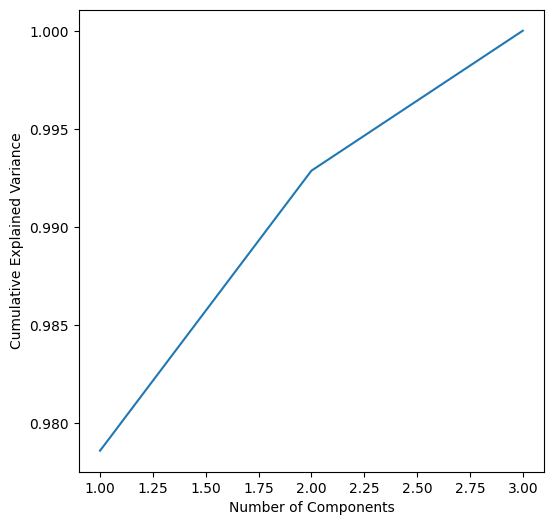

In [78]:
# Compute the PCs using PCA
pca = PCA()
turtles_pca_auto = pca.fit_transform(numeric_cols_scaled)

# Compare the output to the manually derived PCs
print("Automatically derived PCs:")
print(turtles_pca_auto)
print("\nManually derived PCs:")
print(PCs)

# Build a scree plot with the proportion of variance explained by each of the PCs
plt.figure(figsize=(6,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()